<a href="https://colab.research.google.com/github/samans98/practice/blob/main/Fruit_Classifier_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
import tensorflow as tf
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from PIL import Image
from glob import glob
from google.colab import drive

In [ ]:
"""Fruits 360 dataset: The dataset contains 90380 images of fruits and vegetables captured using\
 a Logitech C920 camera.Behind the fruits, a white sheet of paper is placed as a background."""

'Fruits 360 dataset: The dataset contains 90380 images of fruits and vegetables captured using a Logitech C920 camera.Behind the fruits, a white sheet of paper is placed as a background.'

In [ ]:
#Mounting the drive
drive.mount('/content/gdrive')
#Setting kaggle configuration directory
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
%cd /content/gdrive/My Drive/Kaggle
#Downloading and unzip dataset
!kaggle datasets download -d moltean/fruits
!unzip \*.zip && rm *.zip

Streaming output truncated to the last 5000 lines.
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/111_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/112_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/113_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/114_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/115_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/116_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/117_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/119_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/120_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/121_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/122_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/123_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Traini

In [ ]:
!ls .


'Amino Acids copy.parquet'   predictions_HSA.csv     test.csv
 belka_train_100k.csv	     predictions_sEH.csv     test_enc.parquet
 combined_results.csv	     sample_submission.csv   test.parquet
 fruits-360_dataset	     submission_3.csv	     train_enc_1.csv
 fruits-360-original-size    submit_may14_1.csv      train_enc_1.parquet
 ibogaine_halfmil.csv	     submit_may14_2.csv      train_may01_processed_500k.csv
 kaggle_copy.json	     submit_may14_3.csv      train.parquet
 output_file.csv	     submit_may16_2.csv      train_sample_12_7.csv
 predictions_BRD4.csv	     submit_may16_3.csv


In [ ]:
#Printing all file names under the input directory
for dirname, _, filenames in os.walk('./fruits-360_dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Streaming output truncated to the last 5000 lines.
./fruits-360_dataset/fruits-360/Training/Tomato 3/110_100.jpg
./fruits-360_dataset/fruits-360/Training/Tomato 3/111_100.jpg
./fruits-360_dataset/fruits-360/Training/Tomato 3/112_100.jpg
./fruits-360_dataset/fruits-360/Training/Tomato 3/113_100.jpg
./fruits-360_dataset/fruits-360/Training/Tomato 3/114_100.jpg
./fruits-360_dataset/fruits-360/Training/Tomato 3/115_100.jpg
./fruits-360_dataset/fruits-360/Training/Tomato 3/116_100.jpg
./fruits-360_dataset/fruits-360/Training/Tomato 3/117_100.jpg
./fruits-360_dataset/fruits-360/Training/Tomato 3/119_100.jpg
./fruits-360_dataset/fruits-360/Training/Tomato 3/120_100.jpg
./fruits-360_dataset/fruits-360/Training/Tomato 3/121_100.jpg
./fruits-360_dataset/fruits-360/Training/Tomato 3/122_100.jpg
./fruits-360_dataset/fruits-360/Training/Tomato 3/123_100.jpg
./fruits-360_dataset/fruits-360/Training/Tomato 3/124_100.jpg
./fruits-360_dataset/fruits-360/Training/Tomato 3/125_100.jpg
./fruits-360_datase

In [ ]:
!ls

'Amino Acids copy.parquet'   predictions_HSA.csv     test.csv
 belka_train_100k.csv	     predictions_sEH.csv     test_enc.parquet
 combined_results.csv	     sample_submission.csv   test.parquet
 fruits-360_dataset	     submission_3.csv	     train_enc_1.csv
 fruits-360-original-size    submit_may14_1.csv      train_enc_1.parquet
 ibogaine_halfmil.csv	     submit_may14_2.csv      train_may01_processed_500k.csv
 kaggle_copy.json	     submit_may14_3.csv      train.parquet
 output_file.csv	     submit_may16_2.csv      train_sample_12_7.csv
 predictions_BRD4.csv	     submit_may16_3.csv


In [ ]:
import os

# specify the directory you want to switch to
new_directory = "./fruits-360_dataset"

# use os.chdir() to change the directory
os.chdir(new_directory)


In [ ]:
!ls

fruits-360


In [ ]:
#Printing all file names under the input directory
for dirname, _, filenames in os.walk('./fruits-360'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Streaming output truncated to the last 5000 lines.
./fruits-360/Training/Tomato 3/110_100.jpg
./fruits-360/Training/Tomato 3/111_100.jpg
./fruits-360/Training/Tomato 3/112_100.jpg
./fruits-360/Training/Tomato 3/113_100.jpg
./fruits-360/Training/Tomato 3/114_100.jpg
./fruits-360/Training/Tomato 3/115_100.jpg
./fruits-360/Training/Tomato 3/116_100.jpg
./fruits-360/Training/Tomato 3/117_100.jpg
./fruits-360/Training/Tomato 3/119_100.jpg
./fruits-360/Training/Tomato 3/120_100.jpg
./fruits-360/Training/Tomato 3/121_100.jpg
./fruits-360/Training/Tomato 3/122_100.jpg
./fruits-360/Training/Tomato 3/123_100.jpg
./fruits-360/Training/Tomato 3/124_100.jpg
./fruits-360/Training/Tomato 3/125_100.jpg
./fruits-360/Training/Tomato 3/126_100.jpg
./fruits-360/Training/Tomato 3/127_100.jpg
./fruits-360/Training/Tomato 3/128_100.jpg
./fruits-360/Training/Tomato 3/129_100.jpg
./fruits-360/Training/Tomato 3/130_100.jpg
./fruits-360/Training/Tomato 3/131_100.jpg
./fruits-360/Training/Tomato 3/132_100.jpg
./f

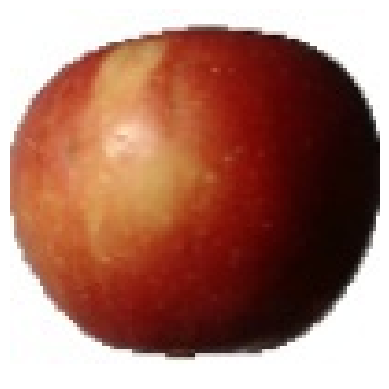

(100, 100, 3)


In [ ]:
#Setting Training & Test dir paths
train_path = './fruits-360/Training/'
test_path = './fruits-360/Test/'
#Displaying the image
img = load_img(train_path + "Apple Braeburn/0_100.jpg", target_size=(100,100))
plt.imshow(img)
plt.axis("off")
plt.show()
#Printing the shape of the image array
x = img_to_array(img)
print(x.shape)

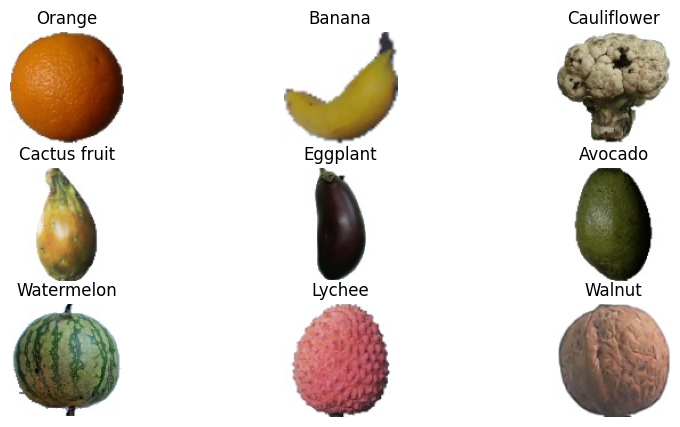

In [ ]:
#Visualizing more Images
images = ['Orange', 'Banana', 'Cauliflower', 'Cactus fruit', 'Eggplant', 'Avocado', 'Watermelon','Lychee', 'Walnut']
fig = plt.figure(figsize =(10,5))
for i in range(len(images)):
    ax = fig.add_subplot(3,3,i+1,xticks=[],yticks=[])
    plt.title(images[i])
    plt.axis("off")
    ax.imshow(load_img(train_path + images[i] +"/0_100.jpg", target_size=(100,100)))

In [ ]:
#Storing occurences of fruits in a list
fruits = []
fruits_image = []
for i in os.listdir(train_path):
    for image_filename in os.listdir(train_path + i):
        fruits.append(i)
        fruits_image.append(i + '/' + image_filename)
#Finding top 10 frequent Fruits
newData = Counter(fruits)
frequent_fruits = newData.most_common(10)
print("Top 10 frequent Fruits:")
frequent_fruits

Top 10 frequent Fruits:


[('Grape Blue', 984),
 ('Plum 3', 900),
 ('Cherry 2', 738),
 ('Cherry Rainier', 738),
 ('Melon Piel de Sapo', 738),
 ('Peach 2', 738),
 ('Strawberry Wedge', 738),
 ('Tomato 1', 738),
 ('Tomato 3', 738),
 ('Walnut', 735)]

In [ ]:
#Finding number of classes
className = glob(train_path + '/*')
number_of_class = len(className)
print(number_of_class)

131


In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  1


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 activation (Activation)     (None, 98, 98, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 47, 47, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 32)        0         
 g2D)                                                   

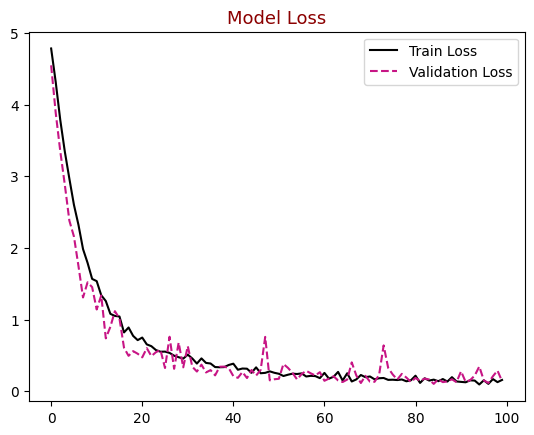

In [ ]:
# Creating the model with GPU
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=x.shape))
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(number_of_class))
model.add(Activation("softmax"))

# Compiling the model
model.compile(loss="categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

# Getting model's summary
model.summary()

# Specifying epochs & batch size
epochs = 100
batch_size = 64

# Creating an object of ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.3,
                                   horizontal_flip=True,
                                   zoom_range=0.3)
test_datagen = ImageDataGenerator(rescale=1./255)

# Generating batches of augmented data
train_generator = train_datagen.flow_from_directory(
    directory=train_path,
    target_size=x.shape[:2],
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical")
test_generator = test_datagen.flow_from_directory(
    directory=test_path,
    target_size=x.shape[:2],
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical")

# Fitting the model
hist = model.fit(
    train_generator,
    steps_per_epoch=1600 // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=800 // batch_size)

# Plotting train & validation loss
plt.figure()
plt.plot(hist.history["loss"], label="Train Loss", color="black")
plt.plot(hist.history["val_loss"], label="Validation Loss", color="mediumvioletred", linestyle="dashed", markeredgecolor="purple", markeredgewidth=2)
plt.title("Model Loss", color="darkred", size=13)
plt.legend()
plt.show()

We cannot use the raw images directly with our model. We’ll need to generate augmented images from the raw ones. Image augmentation is a technique of applying different transformations to original images which result in transformed copies of the same image.

For the purpose of augmentation, we will first create an object of ImageDataGenerator specifying the parameters. Random shifting, rotation, zooming, and rescaling are some of the operations which can be done by ImageDataGenerator.

We’ll then use the flow_from_directory function with the created object to generate augmented images from raw images present in the particular directory. We will also specify parameters like directory, target_size, batch_size, color_mode, and class_mode in the flow_from_directory function.



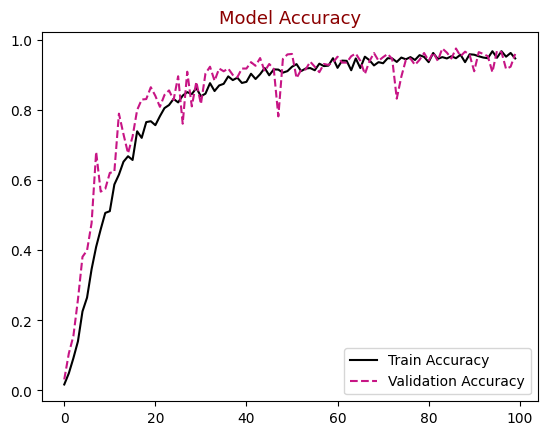

In [ ]:
#Plotting train & validation accuracy
plt.figure()
plt.plot(hist.history["accuracy"],label = "Train Accuracy", color = "black")
plt.plot(hist.history["val_accuracy"],label = "Validation Accuracy", color = "mediumvioletred", linestyle="dashed",markeredgecolor = "purple", markeredgewidth = 2)
plt.title("Model Accuracy", color = "darkred", size = 13)
plt.legend()
plt.show()

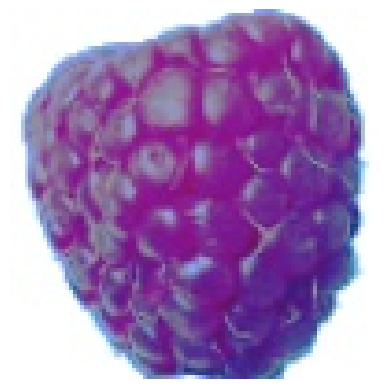

In [ ]:
#Displaying the selected image
img = load_img(test_path + "/Raspberry/77_100.jpg", target_size=(100,100))
plt.imshow(img)
plt.axis("off")
plt.show()
#Loading the image
def load(filename):
    np_image = Image.open(filename)
    np_image = np.array(np_image).astype('float32')/255
    np_image = np.expand_dims(np_image, axis=0)
    return np_image
image = load('./fruits-360/Test/Raspberry/77_100.jpg')

In [ ]:
#Predicting the class
prediction = (np.argmax(model.predict(image), axis=-1))
print(prediction)

1/1 [==============================] - 0s 276ms/step
[113]


In [ ]:
#Printing class dictionary
print(test_generator.class_indices)

{'Apple Braeburn': 0, 'Apple Crimson Snow': 1, 'Apple Golden 1': 2, 'Apple Golden 2': 3, 'Apple Golden 3': 4, 'Apple Granny Smith': 5, 'Apple Pink Lady': 6, 'Apple Red 1': 7, 'Apple Red 2': 8, 'Apple Red 3': 9, 'Apple Red Delicious': 10, 'Apple Red Yellow 1': 11, 'Apple Red Yellow 2': 12, 'Apricot': 13, 'Avocado': 14, 'Avocado ripe': 15, 'Banana': 16, 'Banana Lady Finger': 17, 'Banana Red': 18, 'Beetroot': 19, 'Blueberry': 20, 'Cactus fruit': 21, 'Cantaloupe 1': 22, 'Cantaloupe 2': 23, 'Carambula': 24, 'Cauliflower': 25, 'Cherry 1': 26, 'Cherry 2': 27, 'Cherry Rainier': 28, 'Cherry Wax Black': 29, 'Cherry Wax Red': 30, 'Cherry Wax Yellow': 31, 'Chestnut': 32, 'Clementine': 33, 'Cocos': 34, 'Corn': 35, 'Corn Husk': 36, 'Cucumber Ripe': 37, 'Cucumber Ripe 2': 38, 'Dates': 39, 'Eggplant': 40, 'Fig': 41, 'Ginger Root': 42, 'Granadilla': 43, 'Grape Blue': 44, 'Grape Pink': 45, 'Grape White': 46, 'Grape White 2': 47, 'Grape White 3': 48, 'Grape White 4': 49, 'Grapefruit Pink': 50, 'Grapefrui

In [ ]:
#Creating the model with CPU
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = x.shape))
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(number_of_class))
model.add(Activation("softmax"))

#Compiling the model
model.compile(loss = "categorical_crossentropy",
optimizer = "rmsprop",
metrics = ["accuracy"])

#Getting model's summary
model.summary()

#Specifing epochs & batch size
epochs = 100
batch_size = 64

#Creating an object of ImageDataGenerator.
train_datagen = ImageDataGenerator(rescale= 1./255,
shear_range = 0.3,
horizontal_flip=True,
zoom_range = 0.3)
test_datagen = ImageDataGenerator(rescale= 1./255)
#Generating batches of Augmented data.
train_generator = train_datagen.flow_from_directory(
directory = train_path,
target_size= x.shape[:2],
batch_size = batch_size,
color_mode= "rgb",
class_mode= "categorical")
test_generator = test_datagen.flow_from_directory(
directory = test_path,
target_size= x.shape[:2],
batch_size = batch_size,
color_mode= "rgb",
class_mode= "categorical")

#Fitting the model
hist = model.fit_generator(
generator = train_generator,
steps_per_epoch = 1600 // batch_size,
epochs=epochs,
validation_data = test_generator,
validation_steps = 800 // batch_size)

#Plotting train & validation loss
plt.figure()
plt.plot(hist.history["loss"],label = "Train Loss", color = "black")
plt.plot(hist.history["val_loss"],label = "Validation Loss", color = "mediumvioletred", linestyle="dashed",markeredgecolor = "purple", markeredgewidth = 2)
plt.title("Model Loss", color = "darkred", size = 13)
plt.legend()
plt.show()